In [1]:
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu))
tf.config.experimental.set_memory_growth(gpu[0], True)

Num GPUs Available:  1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
#import tensorflow as tf
#import tf.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

%matplotlib inline

In [3]:
train = 'seg_train/seg_train'
test  = 'seg_test/seg_test'
pred  = 'seg_pred/seg_pred'

In [4]:
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [5]:
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str( test + '//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 437 in folder buildings
For training data , found 474 in folder forest
For training data , found 553 in folder glacier
For training data , found 525 in folder mountain
For training data , found 510 in folder sea
For training data , found 501 in folder street


In [6]:
files = gb.glob(pathname= str(pred + '/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [7]:
categories = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

In [8]:
train_size = []
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        train_size.append(image.shape)
pd.Series(train_size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(134, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(97, 150, 3)         1
(115, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(141, 150, 3)        1
(149, 150, 3)        1
(81, 150, 3)         1
(103, 150, 3)        1
(131, 150, 3)        1
(76, 150, 3)         1
(100, 150, 3)        1
(120, 150, 3)        1
(145, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(147, 150, 3)        1
(105, 150, 3)        1
(133, 150, 3)        1
(110, 150, 3)        1
dtype: int64

In [9]:
test_size = []
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str( test + '//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        test_size.append(image.shape)
pd.Series(test_size).value_counts()

(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

In [10]:
size = 100 #the size or images

In [11]:
X_train = []
y_train = []
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_train.append(list(image_array))
        y_train.append(categories[folder])
        
#print('X_train Length:', len(X_train))
#print('y_train Length:', len(y_train))

In [12]:
print('X_train Length:', len(X_train))
print('y_train Length:', len(y_train))

X_train Length: 14034
y_train Length: 14034


C:\Users\pc\anaconda3\envs\gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


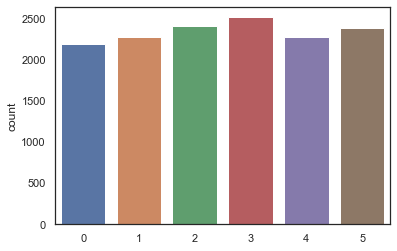

In [13]:
sns.set(style='white', context='notebook', palette='deep')
sns.countplot(y_train, x='data')
plt.show()

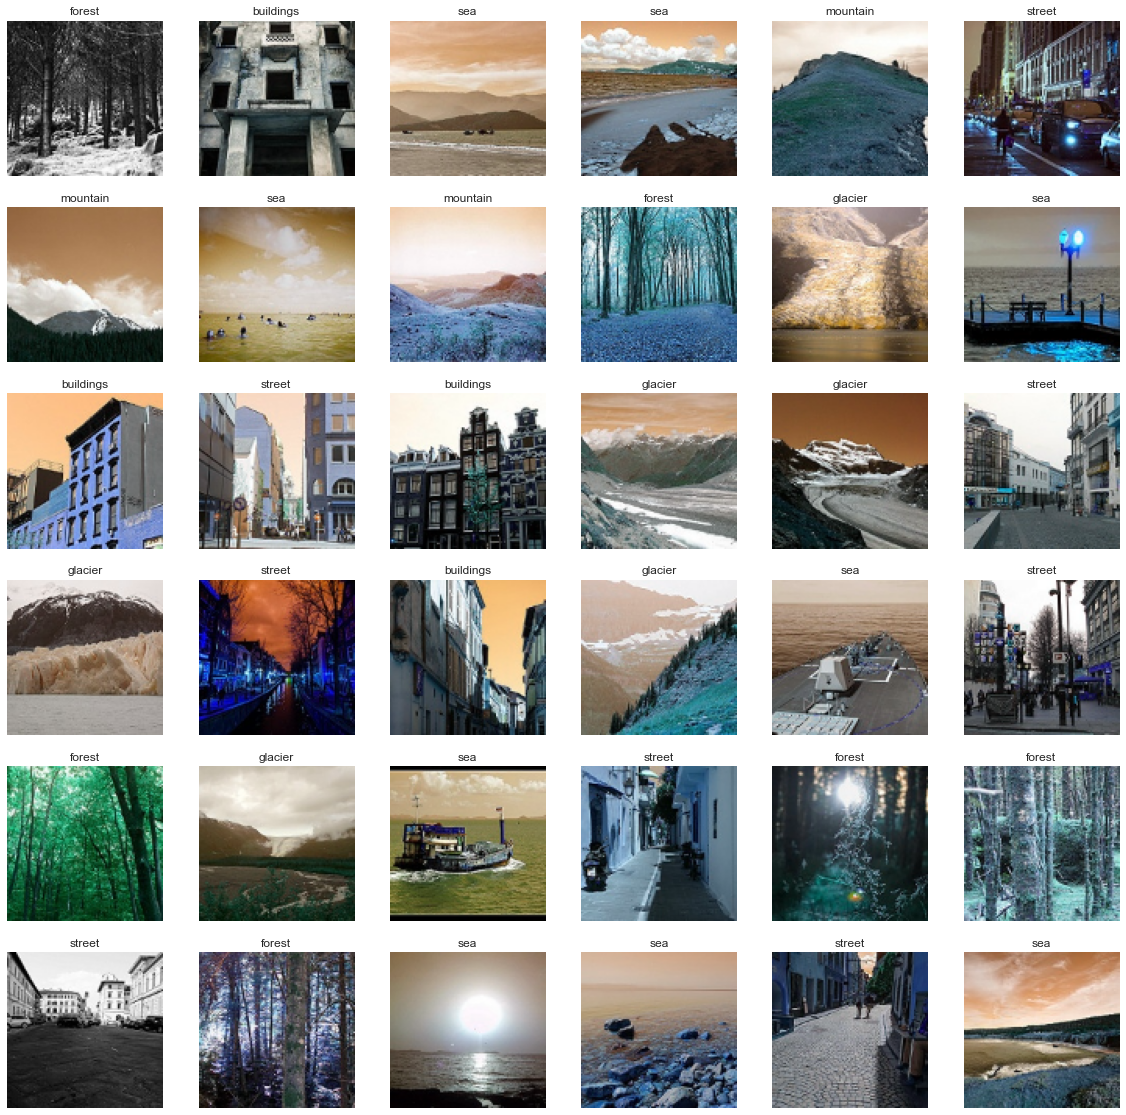

In [14]:
def getcode(n) : 
    for x , y in categories.items() : 
        if n == y : 
            return x  

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [15]:
X_test = []
y_test = []
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str(test + '//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_test.append(list(image_array))
        y_test.append(categories[folder])
        
print('X_test Length:', len(X_test))
print('y_test Length:', len(y_test))

X_test Length: 3000
y_test Length: 3000


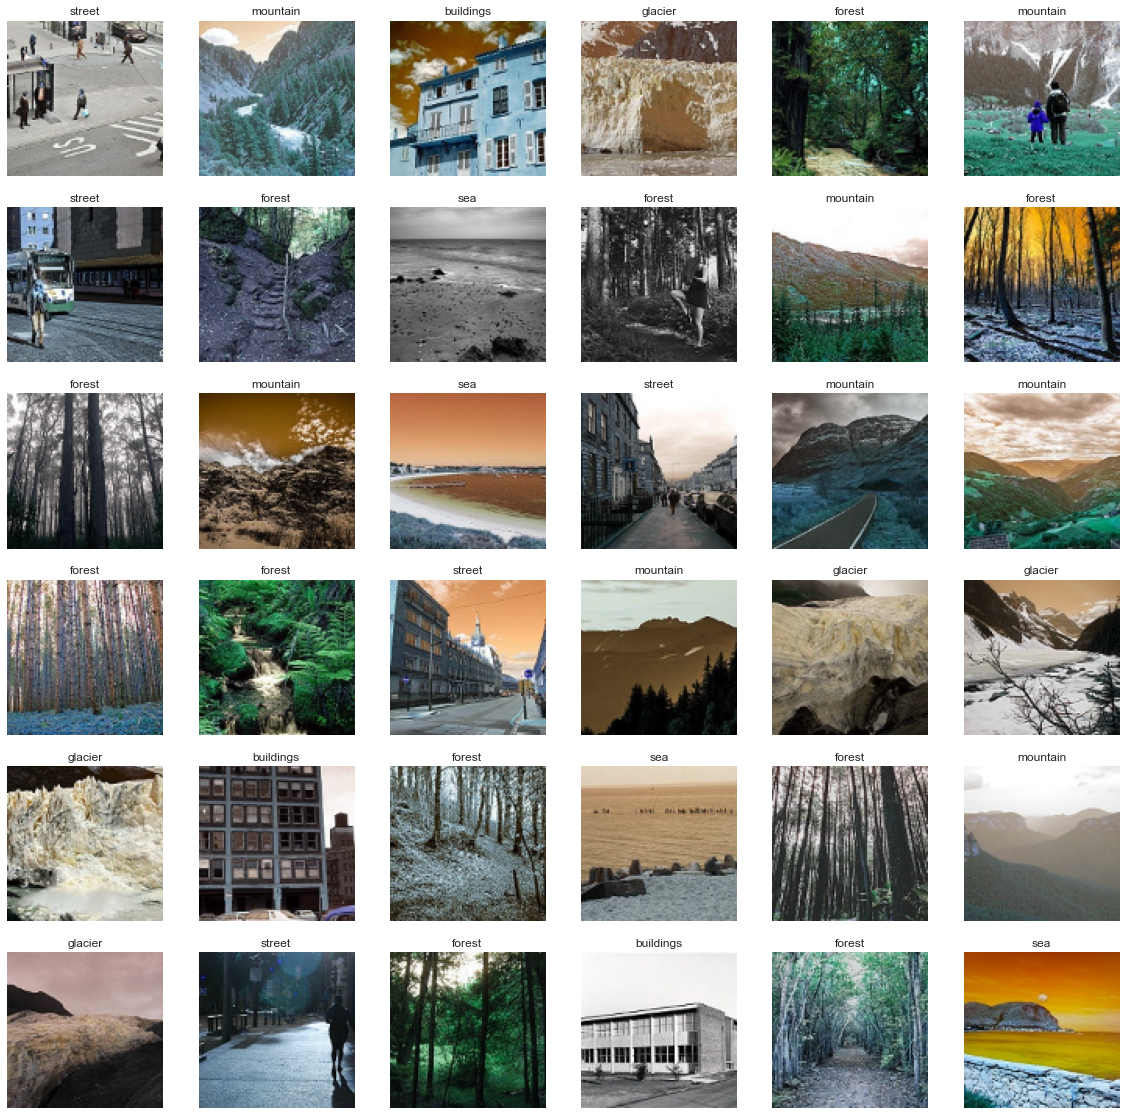

In [16]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [17]:
'''
X_pred = []
files = gb.glob(pathname= str(pred + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_pred.append(list(image_array))       

print('X_pred Length:', len(X_pred))'''

"\nX_pred = []\nfiles = gb.glob(pathname= str(pred + 'seg_pred/*.jpg'))\nfor file in files: \n    image = cv2.imread(file)\n    image_array = cv2.resize(image , (size,size))\n    X_pred.append(list(image_array))       \n\nprint('X_pred Length:', len(X_pred))"

In [18]:
'''
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
'''

"\nplt.figure(figsize=(20,20))\nfor n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : \n    plt.subplot(6,6,n+1)\n    plt.imshow(X_pred[i])    \n    plt.axis('off')\n"

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)
#X_pred = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print('X_train shape:',  X_train.shape)
print('X_test shape:',   X_test.shape)
#print('X_pred shape:',   X_pred.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',  y_test.shape)

X_train shape: (14034, 100, 100, 3)
X_test shape: (3000, 100, 100, 3)
y_train shape: (14034,)
y_test shape: (3000,)


In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
Model =tf.keras.models.Sequential([tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(size,size,3), padding = 'Same'),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding = 'Same'),
                                tf.keras.layers.MaxPool2D(5,5),
                                tf.keras.layers.Dropout(rate=0.2),
                                tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding = 'Same'),    
                                tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding = 'Same'),    
                                tf.keras.layers.MaxPool2D(4,4),
                                tf.keras.layers.Dropout(rate=0.1),  
                                tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu', padding = 'Same'),
                                tf.keras.layers.Dropout(rate=0.05),
                                tf.keras.layers.Conv2D(8,kernel_size=(3,3),activation='relu', padding = 'Same'),
                                tf.keras.layers.Dropout(rate=0.02),
                                tf.keras.layers.Flatten() ,
                                tf.keras.layers.Dense(256,activation='relu'),
                                tf.keras.layers.Dropout(rate=0.4), 
                                tf.keras.layers.Dense(128,activation='relu'),
                                tf.keras.layers.Dropout(rate=0.3),
                                tf.keras.layers.Dense(64,activation='relu'),
                                tf.keras.layers.Dropout(rate=0.2),
                                tf.keras.layers.Dense(32,activation='relu') ,
                                tf.keras.layers.Dropout(rate=0.1),            
                                tf.keras.layers.Dense(16,activation='relu') ,
                                tf.keras.layers.Dropout(rate=0.05),
                                tf.keras.layers.Dense(8,activation='relu') ,
                                tf.keras.layers.Dropout(rate=0.02),
                                tf.keras.layers.Dense(6,activation='softmax')])


Model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 256)     7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 256)     1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     295040    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        1

In [22]:
'''
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
'''

'\nconfig = tf.compat.v1.ConfigProto()\nconfig.gpu_options.allow_growth = True\nsession = tf.compat.v1.Session(config=config)\n'

In [23]:
Model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2, callbacks=[learning_rate_reduction], validation_split=.1, shuffle=True)

Epoch 1/100


ResourceExhaustedError:  OOM when allocating tensor with shape[100,128,100,100] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential/conv2d_1/Relu (defined at <ipython-input-23-bc376db9bd03>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_1907]

Function call stack:
train_function


In [ ]:
#Model.save('6classes.model')